In [1]:
# Estos son algunos de los módulos que emplearás.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Paso 1: Cargar datos y descripción básica

In [2]:
# 1. Lee el dataset del archivo iris_binary.txt y genera un dataframe de pandas.
# 2. Muestra algunos
# 3. Analiza la información básica del dataset: número de instancias, número de atributos, tipos de datos de los
# atributos entre otros. ¿Qué método genera esto?
# 4. Genera información con base en estadística descriptiva.
# 5. Cuenta el número de clases de la variable de salida.

raw_data = pd.read_csv("genero.txt")
raw_data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
raw_data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
raw_data["Gender"].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [6]:
# Mostrar valores de correlación (hint: corr)
raw_data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


<AxesSubplot:>

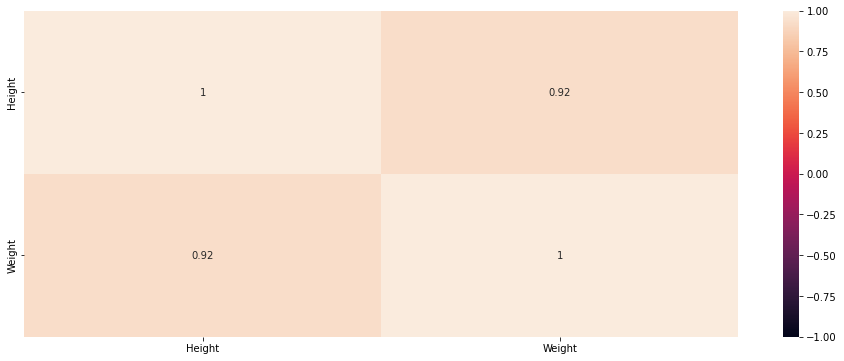

In [7]:
plt.figure(figsize=(16, 6))
sns.heatmap(raw_data.corr(), vmin=-1, vmax=1, annot=True)

## En este apartado escribe tus observaciones sobre este primer paso. ¿Qué puedes decir con base en la información básica del dataset?

* Es un dataset relativamente grande, ya que cuenta con 10000 instancias 
* Los features de height y weight muestran correlaciones muy altas 
* La clase de genero esta balanceada ya que hay 50 - 50 datos 
* Vemos que los valores maximos de las columnas de height y weight son muy diferentes (uno pesa más que el otro)
* Tenemos puros features tipo float

# Paso 2: Gráficas del dataset

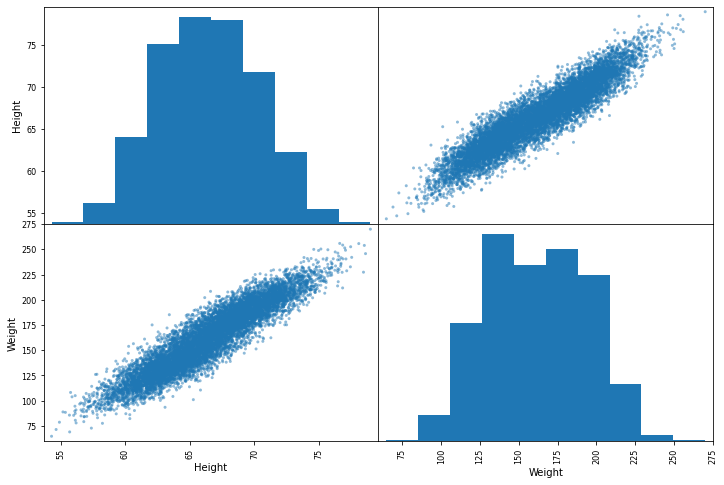

In [8]:
# Mostrar scatter_matrix (hint: scatter_matrix)
from pandas.plotting import scatter_matrix
attributes = ["Height","Weight"]
scatter_matrix(raw_data[attributes], figsize=(12,8))
plt.show()

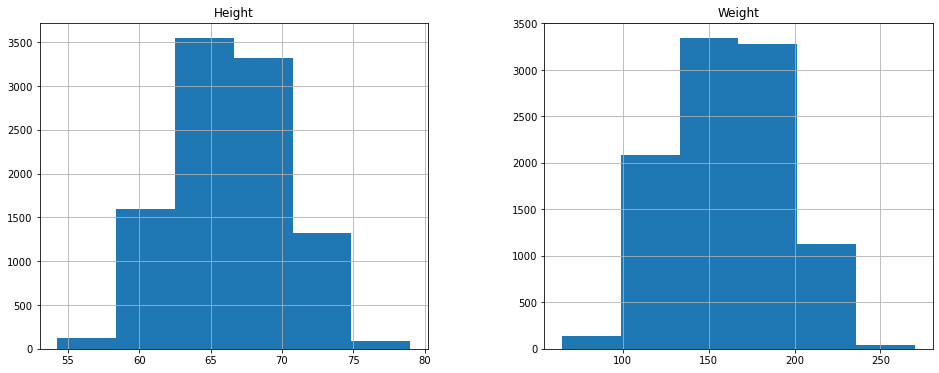

In [9]:
# Generar histogramas para los atributos numéricos (hint: hist)

raw_data.hist(bins = 6, figsize=(16,6))
plt.show()

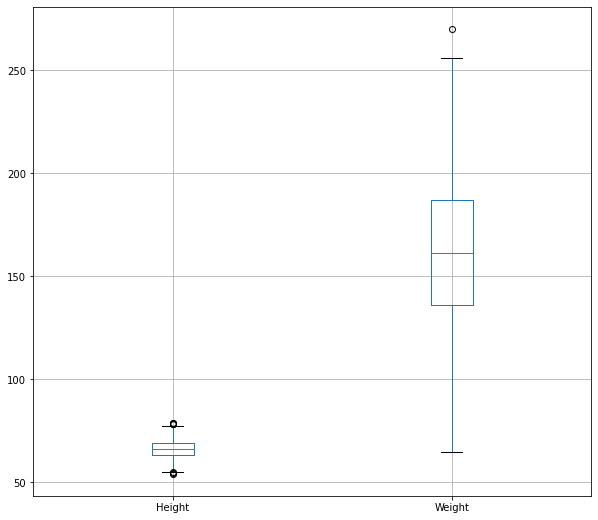

In [10]:
# Boxplots de los atributos numéricos
raw_data.boxplot(figsize=(10,9))
plt.show()

## En esta sección redacta tus observaciones con base en la interpretación de todas las gráficas solicitadas.

* En los graficos de dispersion, se puede ver claramente una relacion lineal entre las variables  
* Con los historgamas vemos que los datos de ambas columnas siguen una distribucion normal o gausiana 
* La diferencia más notoria de los histogramas es que la segunda barra es más grande en el grafico de peso
* En el diagrama de cajas vemos que la altura tiene un rango mucho más corto que el de peso
* Podemos observar que el rango intercuartilico de peso tiene una concentracion más amplia que el de altura 

# Paso 3: Preparar dataset

In [11]:
# Cambia los atributos categóricos en una representación que pueda ser procesada rápidamente por un algoritmo de 
# aprendizaje automático.
raw_data.replace('Female', 0, inplace=True)
raw_data.replace('Male', 1, inplace=True)
raw_data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [12]:
# Genera la matriz de instancias y el vector de salidas (hint: numpy array)

X = np.array(raw_data[['Height', 'Weight']])
Y = np.array(raw_data[['Gender']])

In [13]:
# Genera los training y test sets (hint: train_test_split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Paso 4: Crea el modelo del árbol de decisión
# Usa el módulo DecisionTreeClassifier de Scikit-learn

In [14]:
# Usa los árboles de decisión (algoritmo CART: produce solo árboles binarios)
# Genera el objeto para el modelo
# Ajusta el modelo al training set (hint: fit)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)


DecisionTreeClassifier()

In [15]:
# Gráficar el árbol de decisión
from sklearn.tree import export_graphviz
attr_names = ['Height', 'Weight']
class_names = "Gender"
export_graphviz(model, 
                out_file="my_tree.dot",
                feature_names=attributes,
                class_names=class_names,
                rounded=True,
                filled=True
)
# Instalar Graphviz: https://graphviz.org/download/
# Una vez instalador, ejecutar lo siguiente en la terminal (en el directorio donde esté el archivo my_tree.dot):
# >dot -Tpng my_tree.dot -o my_tree.png

[Text(0.5103678442740647, 0.9838709677419355, 'Weight <= 162.471\ngini = 0.5\nsamples = 8000\nvalue = [4012, 3988]\nclass = G'),
 Text(0.2506705318197827, 0.9516129032258065, 'Weight <= 152.196\ngini = 0.183\nsamples = 4107\nvalue = [3689, 418]\nclass = G'),
 Text(0.13719487415675544, 0.9193548387096774, 'Weight <= 145.692\ngini = 0.088\nsamples = 3395\nvalue = [3238, 157]\nclass = G'),
 Text(0.05912871501720354, 0.8870967741935484, 'Weight <= 134.816\ngini = 0.053\nsamples = 2895\nvalue = [2816, 79]\nclass = G'),
 Text(0.018097586085448782, 0.8548387096774194, 'Weight <= 121.334\ngini = 0.02\nsamples = 1904\nvalue = [1885, 19]\nclass = G'),
 Text(0.00693560185310612, 0.8225806451612904, 'Height <= 59.99\ngini = 0.004\nsamples = 889\nvalue = [887, 2]\nclass = G'),
 Text(0.00520170138982959, 0.7903225806451613, 'Height <= 59.978\ngini = 0.013\nsamples = 295\nvalue = [293, 2]\nclass = G'),
 Text(0.00346780092655306, 0.7580645161290323, 'Weight <= 117.767\ngini = 0.007\nsamples = 294\nval

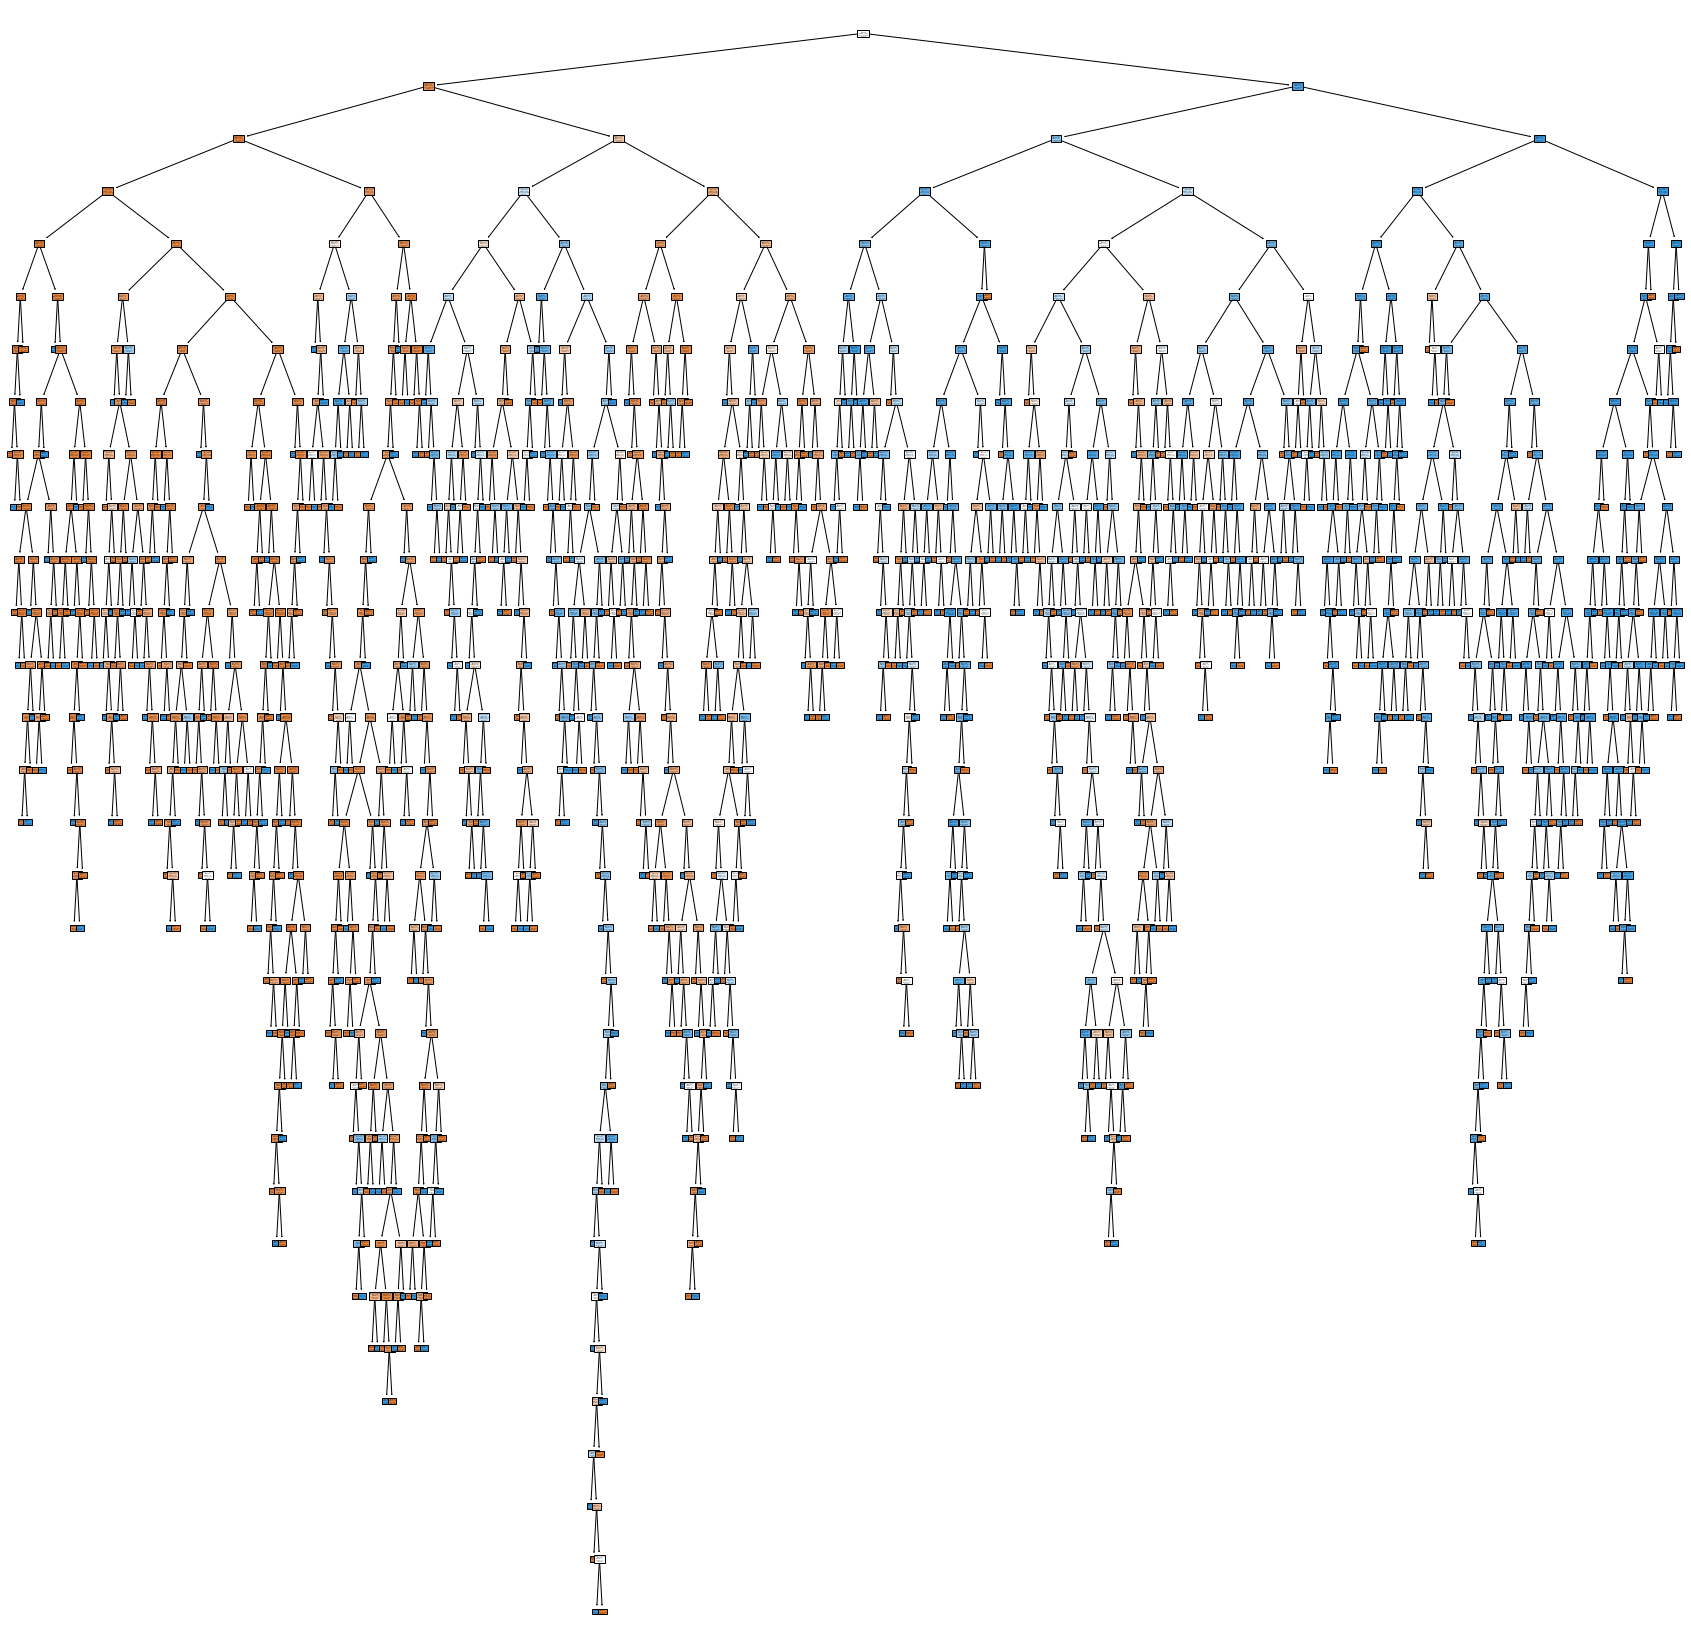

In [16]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(model, feature_names=('Height', 'Weight'), class_names = ("Gender"), filled=True)


# Paso 5: Usa el modelo para realizar predicciones

In [17]:
# Realizar predicciones con base en el test set
y_pred = model.predict(X_test)

# Paso 6: Evalúa el modelo usando todas las herramientas de evaluación de clasificadores binarios.

In [18]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
print(f"Average: {round(scores.mean(),2)} Std Dev: +/-{round(scores.std(),2)}")

Average: 0.87 Std Dev: +/-0.01


In [19]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test, y_pred)
cfm

array([[855, 133],
       [114, 898]])

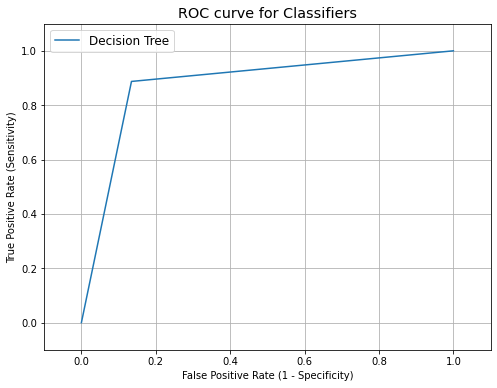

In [20]:
y_pred_prob_pos =model.predict_proba(X_test)[:,1]

plt.figure(figsize=(8, 6))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Classifiers') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.grid(True)
    
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_pos)
plt.plot(fpr, tpr, label="Decision Tree")
    
plt.legend()

## Analiza la información generada por las herramientas de evaluación. 
## ¿Qué conclusiones puedes obtener del comportamiento del árbol de decisión?



Podemos ver que se genera un arbol de desicones bastante complejo y profundo, ya que tiene una cantidad tremenda de niveles y de nodos. Esto se debe a que no emplemos hiperparametros que limiten la libertad del algoritmo. Tambien dado las metricas podemos ver que es un algoritmo bastante decente en cuanto a exactitud, ya que se consiguio un 87% con desviacion estandar de 0.01%, lo cual es bastante bueno. Viendo la matriz de confusion notamos que muestra una dificultad por igual al momento de clasificar los falsos negativos y lo falsos positivos, es decir los errores los comente parejos. Por ultimo, en cuanto a su curva roc, la cual se ve bastante decente ya que esta cerca de hacer un angulo de 90 grados. Quiere decir que el algoritmo sabe separar bien las categorias la mayor parte del tiempo.

# Paso 7: Usando el training set y test set que generaste en este script, crea el modelo para k-NN y evalúa su desempeño con todas las herramientas que usaste para el árbol de decisión. Analiza los resultados de los dos algoritmos y compara su desempeño. ¿Algún algoritmo se comporta mejor que el otro? Escribe aquí todas tus observaciones.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3, algorithm="brute")
model2.fit(X_train, Y_train.ravel())

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [22]:
Y_pred = model2.predict(X_test)

In [26]:
scores2 = cross_val_score(model2, X, Y.ravel(), cv=5, scoring='accuracy')
print(f"Average: {round(scores2.mean(),3)} Std Dev: +/-{round(scores2.std(),3)}")

Average: 0.903 Std Dev: +/-0.004


In [24]:
cfm = confusion_matrix(Y_test, Y_pred)
cfm

array([[881, 107],
       [ 87, 925]])

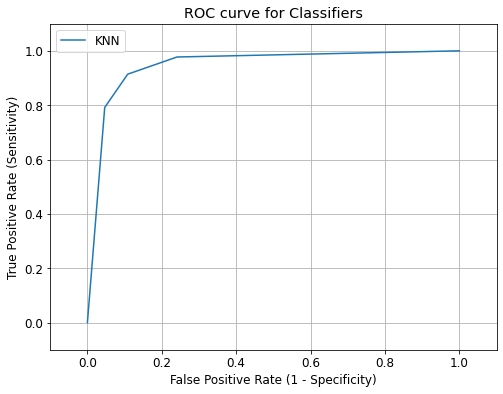

In [25]:
y_pred_prob_pos =model2.predict_proba(X_test)[:,1]

plt.figure(figsize=(8, 6))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Classifiers') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.grid(True)
    
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_pos)
plt.plot(fpr, tpr, label="KNN")
    
plt.legend()

### Con el algoritmo KNN vemos resultados un poco mejores a que con los arboles de desicion.  La exactitud de KNN es de 90%, un 3% mejor que los arboles de desicion. Parte KNN tiene una desviacion estandar de menos del 0.01%. Cuando comparamos la matriz de confusion podemos notar que se tiene algunos probelmas para clasificar algunos negativos que clasifica como positivos, en otras palabras los false positives. Sin embargo, cuando comparamos la curva roc, vemos un mejor desempeño, almenos a simple vista, de KNN, ya que su curva se ve mucho más pegada a la esquina. En resumen y para concluir, KNN, es notablemente mejor en todas las metricas usadas, que arboles de desicion. Cabe recalcar que esto es con este conjunto de datos en especifico, puede que cambien los resultados con otro set de datos.